In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Aufrufen des gesamten abgespeicherten Files
ds=xr.open_dataset("C:/Users/Aspire_NB/Desktop/era5_data/small_era5_daily.nc")
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 9, time: 14610)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
  * longitude  (longitude) float32 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0
  * latitude   (latitude) float32 46.0 47.0 48.0
Data variables:
    r          (time, latitude, longitude) float32 ...
    q          (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...


In [3]:
#gleitendes Mittel über 21 Tage: 1 Fenster in der Mitte, 10 Tage davor, 10 Tage danach (=21)
ds_mean=ds.rolling(time=21,center=True).construct('window_dim')

#Berechnung der Klimatologien
climatology = ds_mean.groupby('time.dayofyear').mean(dim=['window_dim','time'])

In [4]:
climatology

<xarray.Dataset>
Dimensions:    (dayofyear: 366, latitude: 3, longitude: 9)
Coordinates:
  * longitude  (longitude) float32 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0
  * latitude   (latitude) float32 46.0 47.0 48.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    r          (dayofyear, latitude, longitude) float32 49.93388 ... 52.40291
    q          (dayofyear, latitude, longitude) float32 0.0015088615 ... 0.0012816202
    msl        (dayofyear, latitude, longitude) float32 101934.3 ... 102304.99

In [6]:
# Erstellen des rolling windows für die +- 21 Tage (neue Dimension) für die Standardabweichung
#rolling window als neue dimension mit fenster mit +-21 tage
#data_std=ds_mean.rolling(time=21,center=True).construct("window_dim")

data_std = ds_mean.groupby('time.dayofyear').std()

In [8]:
data_std

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    r          (dayofyear) float32 24.812124 24.782173 ... 24.705183 25.596664
    q          (dayofyear) float32 0.00079775834 0.0007875421 ... 0.0007700822
    msl        (dayofyear) float32 1049.0269 1042.7858 ... 1047.4121 1046.5144

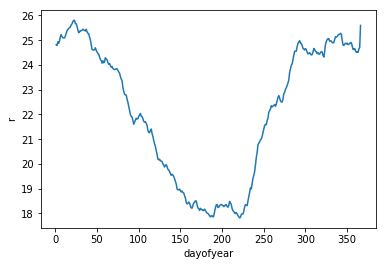

In [10]:
data_std['r'].plot()

In [11]:
#Anomalieberechnung und Normieren dieser
ds_anom = ds.groupby('time.dayofyear') - climatology
ds_anom = ds_anom.groupby('time.dayofyear') / data_std

(array([   132.,    859.,   5595.,  24771.,  65000., 111179., 117990.,
         59147.,   9411.,    386.]),
 array([-4.6536145 , -3.8555984 , -3.0575824 , -2.2595665 , -1.4615505 ,
        -0.6635344 ,  0.13448162,  0.9324976 ,  1.7305137 ,  2.5285296 ,
         3.3265457 ], dtype=float32),
 <a list of 10 Patch objects>)

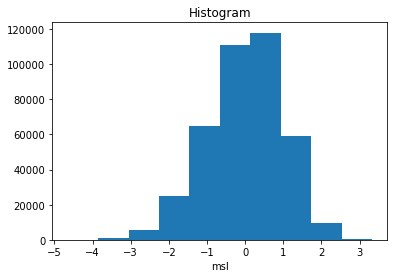

In [12]:
ds_anom['msl'].plot()

In [13]:
ds_anom = ds_anom.chunk({'time': -1})

In [14]:
ds_anom

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 9, time: 14610)
Coordinates:
  * longitude  (longitude) float32 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0
  * latitude   (latitude) float32 46.0 47.0 48.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
    dayofyear  (time) int64 dask.array<shape=(14610,), chunksize=(14610,)>
Data variables:
    r          (time, latitude, longitude) float32 dask.array<shape=(14610, 3, 9), chunksize=(14610, 3, 9)>
    q          (time, latitude, longitude) float32 dask.array<shape=(14610, 3, 9), chunksize=(14610, 3, 9)>
    msl        (time, latitude, longitude) float32 dask.array<shape=(14610, 3, 9), chunksize=(14610, 3, 9)>

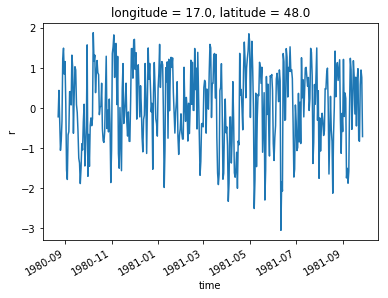

In [21]:
ds_anom.r[600:1000,2,8].plot()
#600-1000 gewählte zeitpunkte und 2 bzw.8 lon und lat